REGRESSION ASSIGNMENT (ML)

1. What is Simple Linear Regression?
- Simple Linear Regression (SLR) attempts to determine the strength and charachterstics of relationship between one independent variable (x) and another dependent variable (y) using a straight line.

2. What are the key assumptions of Simple Linear Regression?
- Linearity > Linear relationship between independent variable (x) and dependent variable (y) as a straight line.
- Independence > Difference between actual and predicted values are independent of each other.
- Homoscedasticity > Spread of data points around the regression line should be roughly the same for all values of x.
- Normality > Dependent variable y is normally distributed.

3. What is heteroscedasticity, and why is it important to address in regression models?
- Hetroscedasticity refers to the situation where the variability (spread) of the errors (residuals) is not constant across all levels of the independent variables.
- It is important to address in regression models because it can give biased coefficient estimates, misleading confidence intervals and hence poor prediction models.

4. What is Multiple Linear Regression?
- Multiple linear regression is a statistical method used to model the relationship between one dependent variable (y) and two or more independent variables (x1, x2, x3).


5. What is polynomial regression, and how does it differ from linear regression?
- Polynomial regression models non-linear relationships by fitting a polynomial equation to the data, while linear regression models linear relationships using a straight line.
- Polynomial regression can capture curves and bends in the data that linear regression cannot.


6. Implement a Python program to fit a Simple Linear Regression model to the following sample data:
- X = [1, 2, 3, 4, 5]
- Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

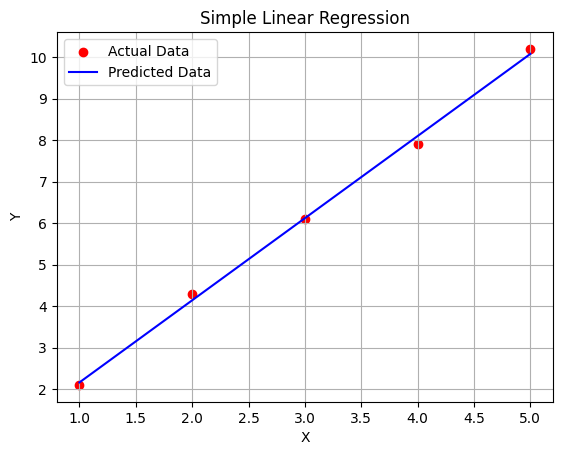

Slope (m): 1.9800000000000004
Intercept (c): 0.17999999999999794


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([2.1,4.3,6.1,7.9,10.2])

model = LinearRegression()
model.fit(x,y)
y_pred = model.predict(x)

plt.scatter(x, y, color='red', label='Actual Data')
plt.plot(x, y_pred, color='blue', label='Predicted Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

print(f'Slope (m): {model.coef_[0]}')
print(f'Intercept (c): {model.intercept_}')

7. Fit a Multiple Linear Regression model on this sample data:
- Area = [1200, 1500, 1800, 2000]
- Rooms = [2, 3, 3, 4]
- Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [4]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

data ={'area': [1200, 1500, 1800, 2000],
       'rooms': [2, 3, 3, 4],
       'price': [250000, 300000, 320000, 370000]}

df = pd.DataFrame(data)
x = df[['area', 'rooms']]
y = df['price']

model = LinearRegression()
model.fit(x,y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(X_with_const.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

#High VIF > Variance Inflation Factor means multicollinearity

Intercept: 103157.89473684214
Coefficients: [   63.15789474 34736.84210526]

Variance Inflation Factors (VIF):
  Feature        VIF
0   const  34.210526
1    Area   7.736842
2   Rooms   7.736842


8. Implement polynomial regression on the following data:
- X = [1,2,3,4,5]
- Y = [2.2,4.8,7.5,11.2,14.7]

Fit a 2nd-degree polynomial and plot the resulting curve

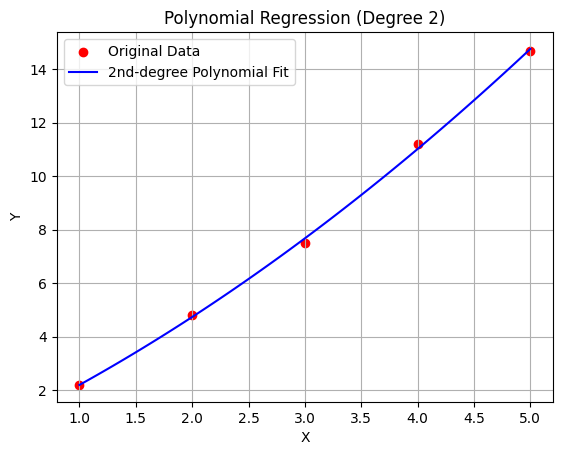

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.array([1,2,3,4,5]).reshape(-1,1)
y = np.array([2.2,4.8,7.5,11.2,14.7])

poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

x_fit = np.linspace(1,5,100).reshape(-1,1)
x_fit_poly = poly.transform(x_fit)
y_pred = model.predict(x_fit_poly)

plt.scatter(x, y, color='red', label='Original Data')
plt.plot(x_fit, y_pred, color='blue', label='2nd-degree Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

9. Create a residuals plot for a regression model trained on this data:
- X = [10, 20, 30, 40, 50]
- Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

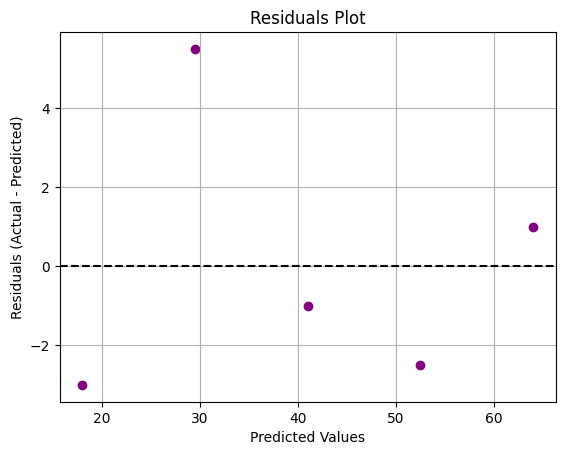

In [7]:
x = np.array([10,20,30,40,50]).reshape(-1,1)
y = np.array([15,35,40,50,65])

model = LinearRegression()
model.fit(x, y)

y_pred = model.predict(x)
residuals = y - y_pred

plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals Plot")
plt.grid(True)
plt.show()
#Interpretation > Residuals are spread unevenly
#Model may violate assumptions of linear regression

10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust model.

For addressing multicollinearity-
- Check VIF (Variance Inflation Factor)
- If it's high, drop or combine correlated variables

For addressing hetroscedasticity-
- Use log transformation
- Use WLS (weighted last squares)